<a href="https://colab.research.google.com/github/MustafaAhmadov/rds/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm


# Custom Gaussian Naive Bayes Classifier Implementation

In [ ]:

class CustomGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for cls in self.classes:
            X_c = X[y == cls]
            self.parameters[cls] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0),
                'prior': X_c.shape[0] / X.shape[0]
            }

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        for cls, params in self.parameters.items():
            prior = np.log(params['prior'])
            conditional = np.sum(np.log(self._pdf(params['mean'], params['var'], x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, mean, var, x):
        return (np.exp(- (x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var))


# Load Dataset and Train Models

In [ ]:

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train custom and sklearn Gaussian Naive Bayes models
custom_nb = CustomGaussianNB()
custom_nb.fit(X_train, y_train)

gnb_sklearn = GaussianNB()
gnb_sklearn.fit(X_train, y_train)


GaussianNB()

# Implementation of Naive Bayes Classifier

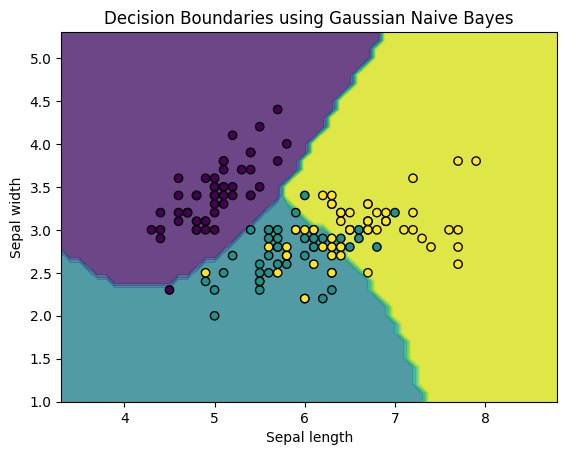

In [13]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We use only the first two features for simplicity
y = iris.target

# Create an instance of Gaussian Naive Bayes and fit the data.
gnb = GaussianNB()
gnb.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class using data and Gaussian Naive Bayes classifier
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries using Gaussian Naive Bayes')
plt.show()


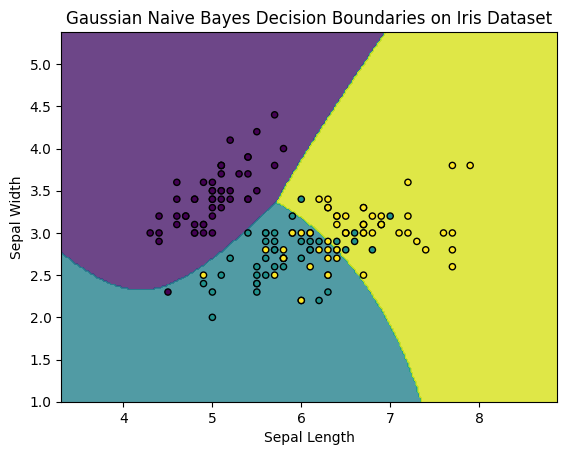

In [15]:


# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Gaussian Naive Bayes Decision Boundaries on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


# Gaussian Naive Bayes: Custom Implementation

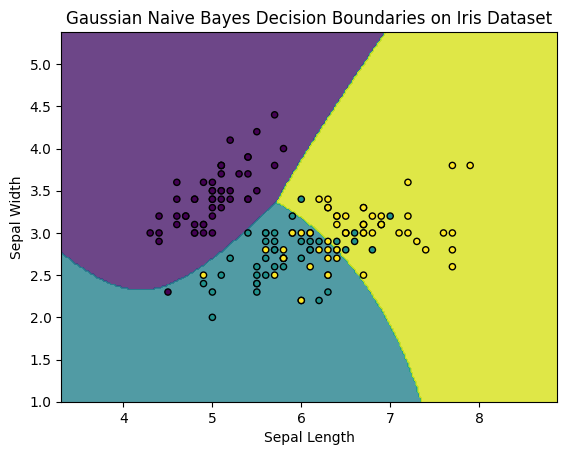

In [12]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Gaussian Naive Bayes Decision Boundaries on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


# Gaussian Naive Bays: sklearn Implementation

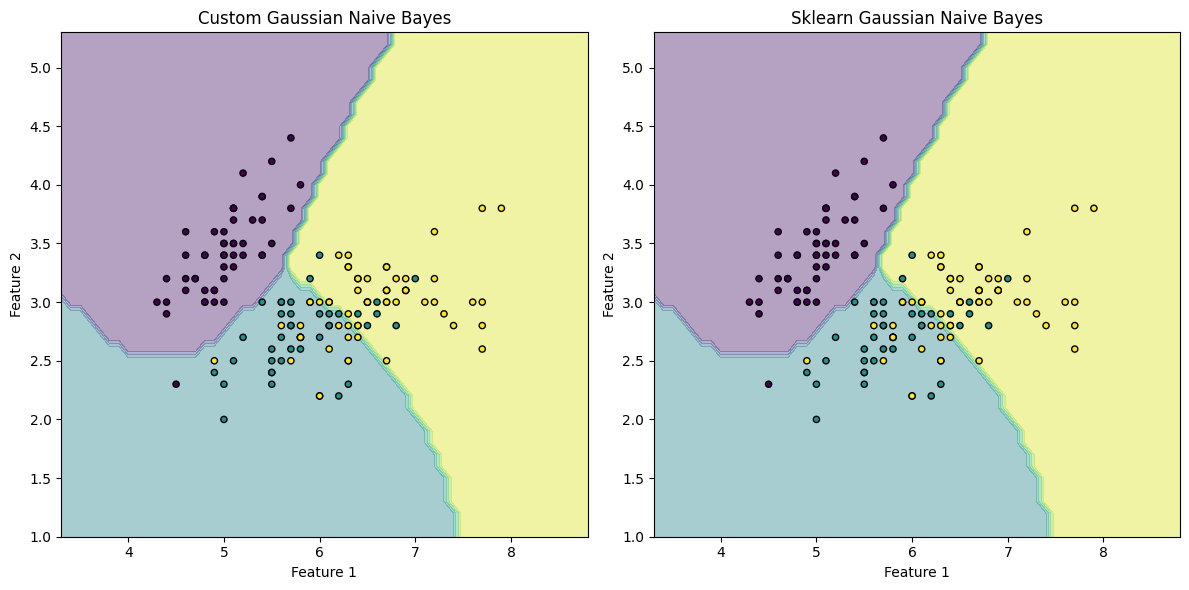

In [16]:
class CustomGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0),
                'prior': X_c.shape[0] / X.shape[0]
            }

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for c, params in self.parameters.items():
            prior = np.log(params['prior'])
            posterior = np.sum(np.log(self._calculate_likelihood(params['mean'],
                                                                params['var'], x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _calculate_likelihood(self, mean, var, x):
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the custom and sklearn Gaussian Naive Bayes models
custom_nb = CustomGaussianNB()
custom_nb.fit(X_train, y_train)

gnb_sklearn = GaussianNB()
gnb_sklearn.fit(X_train, y_train)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict using both models
Z_custom = custom_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = Z_custom.reshape(xx.shape)

Z_sklearn = gnb_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 6))

# Custom Model
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_custom, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Custom Gaussian Naive Bayes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Sklearn Model
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Sklearn Gaussian Naive Bayes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


# Accuracy Comparison Plot

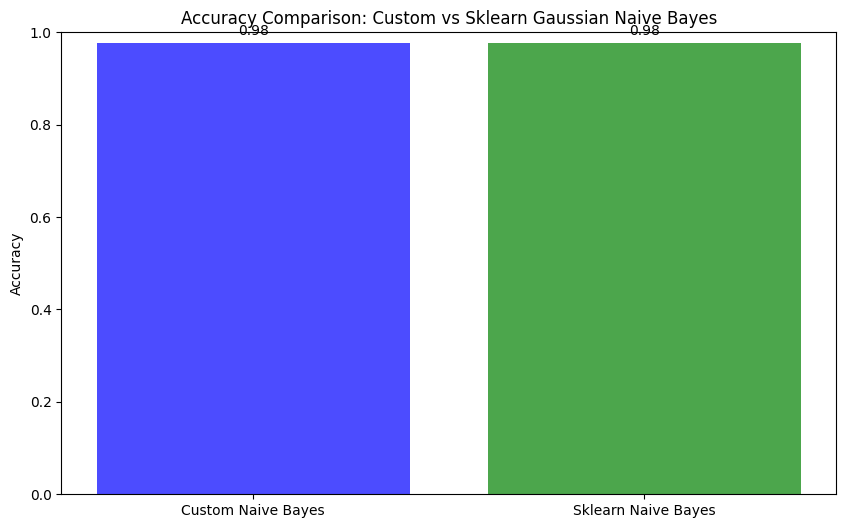

In [6]:

# Make predictions
y_pred_custom = custom_nb.predict(X_test)
y_pred_sklearn = gnb_sklearn.predict(X_test)

# Calculate accuracies
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Define bar labels and accuracies
labels = ['Custom Naive Bayes', 'Sklearn Naive Bayes']
accuracies = [accuracy_custom, accuracy_sklearn]

# Create the bar graph
plt.figure(figsize=(10, 6))
barlist = plt.bar(labels, accuracies, color=['blue', 'green'], alpha=0.7)

# Add the data labels on the bars
for idx, rect in enumerate(barlist):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
             f'{accuracies[idx]:.2f}',
             ha='center', va='bottom', color='black')

# Set the title and labels
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Custom vs Sklearn Gaussian Naive Bayes')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

plt.show()
